<a href="https://colab.research.google.com/github/amol004/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   -  **Bike Sharing Demand Predection**



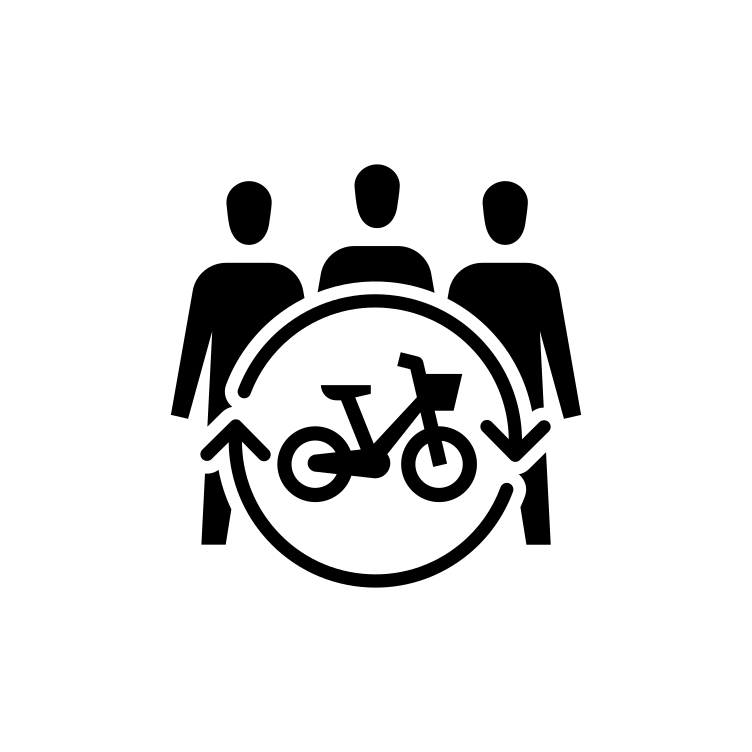

##### **Name** - Amol Thakur
##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **E-mail** - amolthakur004@gmail.com

# **Project Summary -**

**To improve transportation comfort, rental bikes have been provided in several metropolitan areas. It is a huge task to make sure that these rental bikes are offered and reachable to the general public at the appropriate times. By correctly estimating the number of bikes needed at each hour, which is essential for ensuring a steady supply of rental bikes, waiting times may be decreased. To do this, it is necessary to develop a mechanism that forecasts the number of bikes required at each hour using historical data, enabling calculation of the total number of bikes needed throughout the day. 
This would make it possible for municipal planners and bike-sharing companies to more effectively manage the rental bike stock and provide a dependable and efficient service for customers. The supply of rental bikes can be optimised, stockouts can be reduced, and the right number of bikes can be made available at the right time, ultimately improving the experience for users of rental bike services in urban areas. This is made possible by utilising historical data and applying efficient prediction techniques.**

# **GitHub Link -** https://github.com/amol004/Bike-Sharing-Demand-Prediction.git

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the
enhancement of mobility comfort. It is important to make the rental bike
available and accessible to the public at the right time as it lessens the
waiting time. Eventually, providing the city with a stable supply of rental bikes
becomes a major concern. The crucial part is the prediction of bike count
required at each hour for the stable supply of rental bikes.
Uncovering a method to calculate the value forecast of the number of bikes needed at each hour for a steady supply of rental bikes is the goal. If we can perform this using previous data, we should be able to estimate the total number of bikes needed each hour.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd 
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno 
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics 
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler 
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error


### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', header= 0,encoding= 'unicode_escape')


### Dataset First View

In [4]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
np.shape(bike_df)

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
play_df=bike_df.drop_duplicates(keep='first')

In [8]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

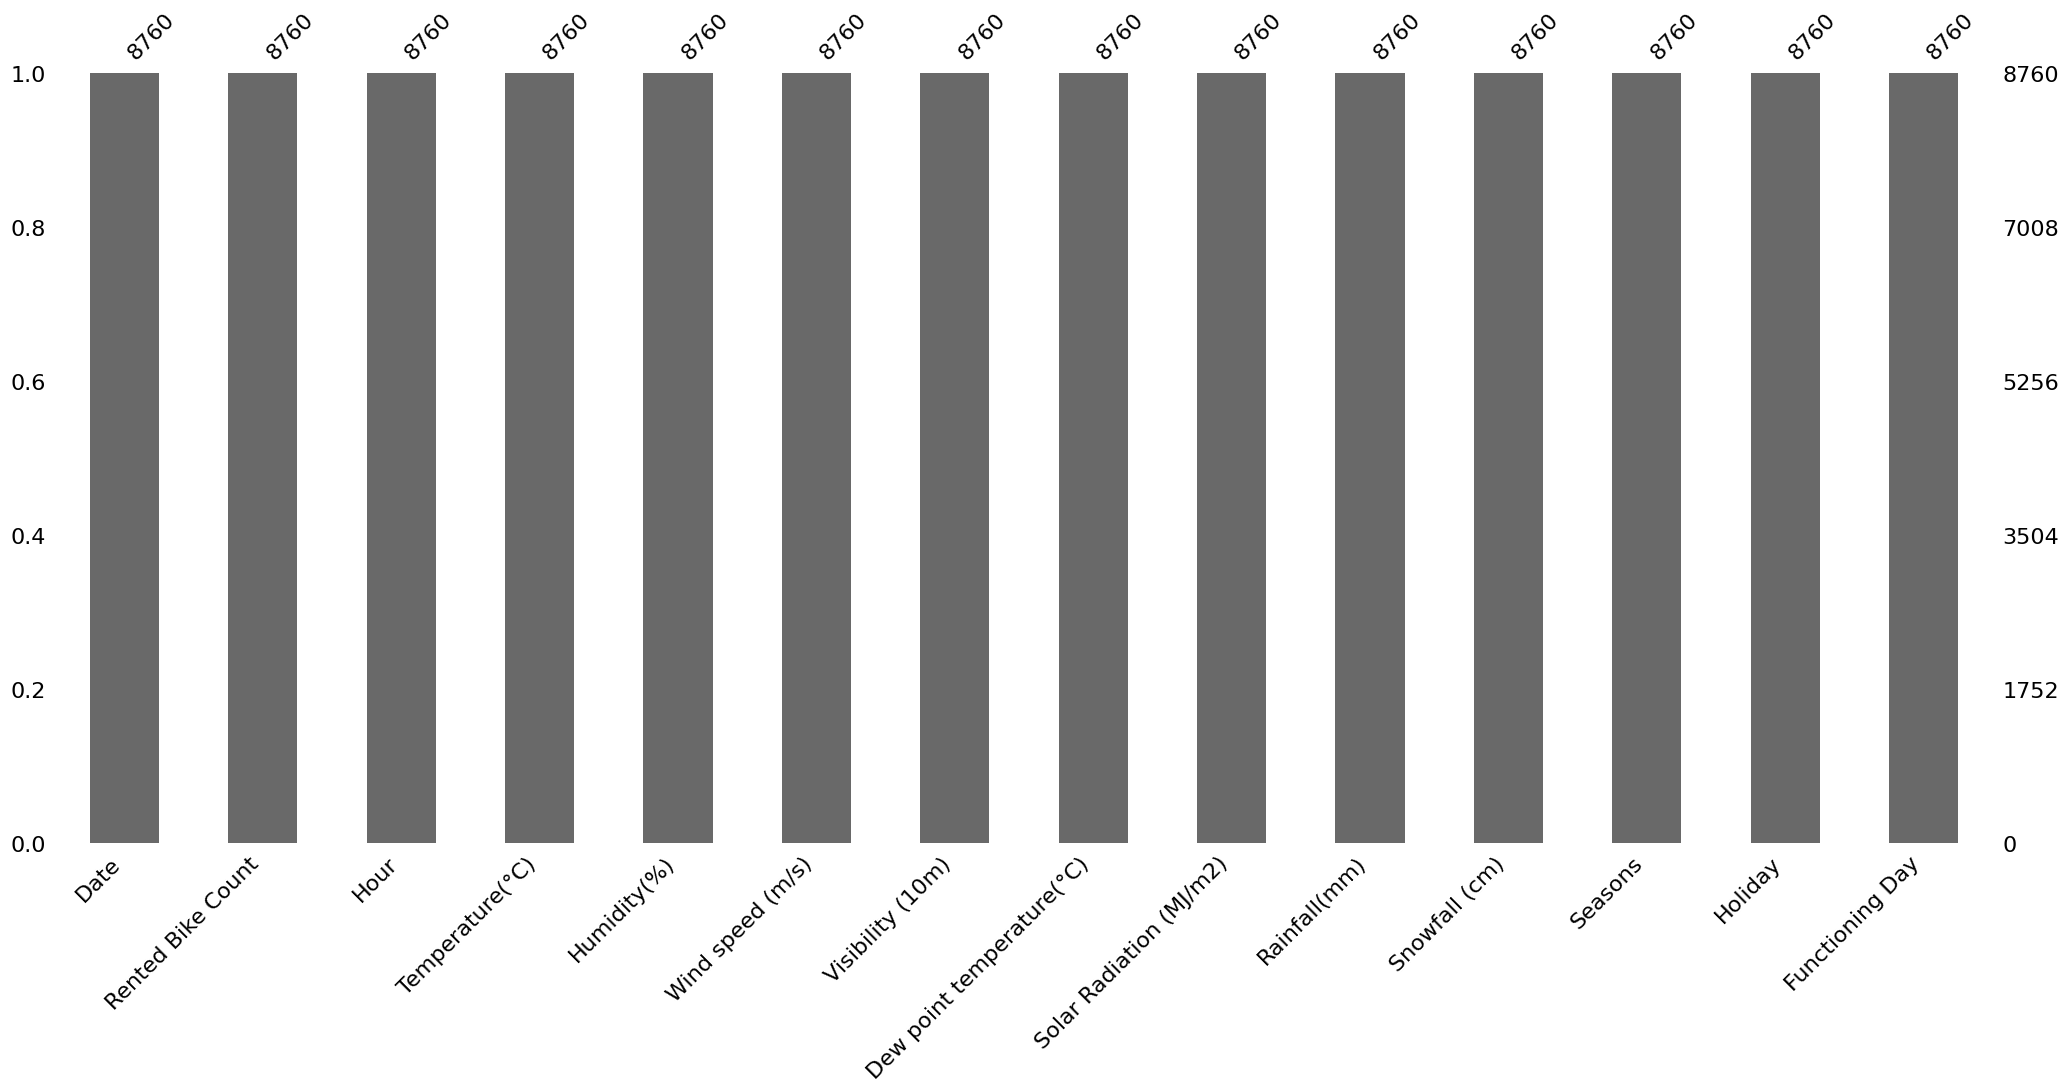

In [10]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(bike_df);

### What did you know about your dataset?

There are no null values and duplicate values present in our dataset which makes analysis much easier

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 


*  Date - year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - humidity in %
*  Windspeed - speed of wind in m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - radiations emitted by sun in MJ/m2
*  Rainfall - total rainfall in mm
*  Snowfall - total snowfall in cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Func(Functional hours)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a

In [14]:
unique_values(bike_df)

COLUMN NAME (Date): 365 unique values
COLUMN NAME (Rented Bike Count): 2166 unique values
COLUMN NAME (Hour): 24 unique values
COLUMN NAME (Temperature(°C)): 546 unique values
COLUMN NAME (Humidity(%)): 90 unique values
COLUMN NAME (Wind speed (m/s)): 65 unique values
COLUMN NAME (Visibility (10m)): 1789 unique values
COLUMN NAME (Dew point temperature(°C)): 556 unique values
COLUMN NAME (Solar Radiation (MJ/m2)): 345 unique values
COLUMN NAME (Rainfall(mm)): 61 unique values
COLUMN NAME (Snowfall (cm)): 51 unique values
COLUMN NAME (Seasons): 4 unique values
COLUMN NAME (Holiday): 2 unique values
COLUMN NAME (Functioning Day): 2 unique values


## 3. ***Data Wrangling***

person-with-mop-folder-concept-data-cleaning-isometric-icon_203633-2849.avif

### Data Wrangling Code

In [15]:
# Changing datatype of columns if necessary
bike_df['Date'] = pd.to_datetime(bike_df['Date'])

In [16]:
# extracting all the necessary date related information from 'Date' column
ll = bike_df
ll['Week Day'] = ll['Date'].dt.day_name()
ll['Day Number'] = ll['Date'].dt.day
ll['Month'] = ll['Date'].dt.month
ll['Year'] = ll['Date'].dt.year
bike_df=ll


In [17]:
# Dropping 'Date' column as we dont need it anymore
bike_df.drop(columns=["Date"],inplace=True)

In [18]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].dtype =='int' or df[col].dtype =='float':
       c.append(col)
  return c
    

In [19]:
bb=numerical_col(bike_df)
bike_df[bb].head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Day Number  Month  Year  
0           0.0            0.0          12      1  2017  
1           0.0            0.0          12      1  2017  
2           0.0            0.0          12      1  2017  
3           0.0            0.0          12      1  2017  
4           0.0            0.0          12      1  2017

In [20]:
bb

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day Number',
 'Month',
 'Year']

In [21]:
# function for selecting all the categorical columns
def categorical_col(df):
  d = []
  for col in df.columns:
    if df[col].dtype == 'O':
       d.append(col)
  return d

In [22]:
categorical_col(bike_df)

['Seasons', 'Holiday', 'Functioning Day', 'Week Day']

### What all manipulations have you done and insights you found?

1. Changed datatype of required columns 
2. Extracted all the necessary date related information from 'Date' column
3. Dropped 'Date' column as we did not needed it anymore
4. Created function for selecting all the numerical columns
5. Created function for selecting all the categorical columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***
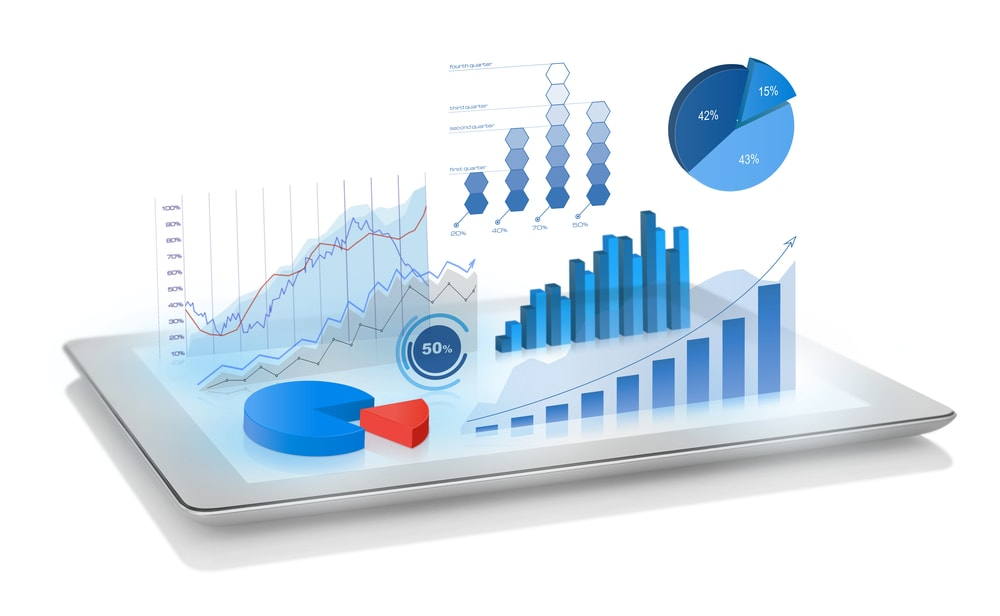

#### Chart - 1

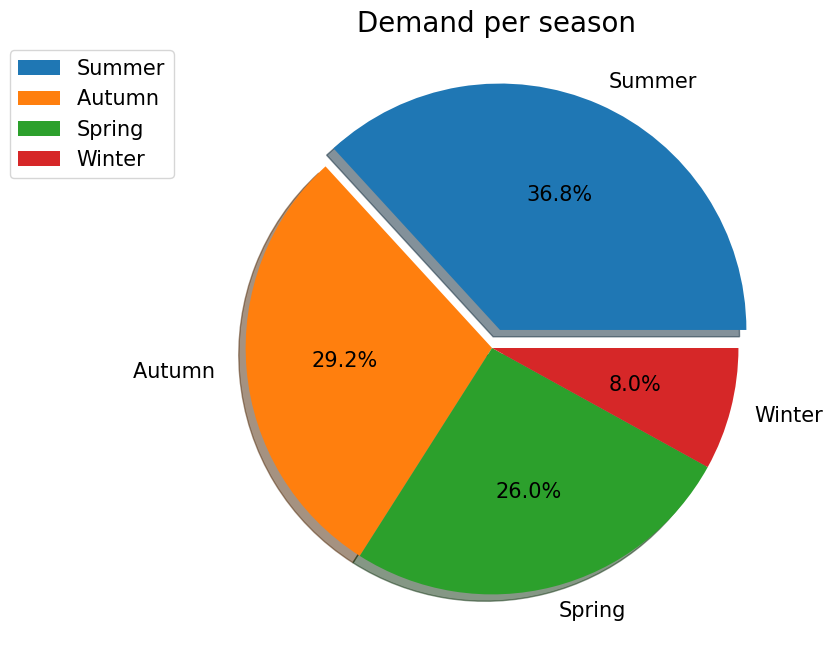

In [23]:
# Finding out max average bike demand per season
plt.rcParams['figure.figsize']=(8,8) # figure size
plt.rcParams['font.size'] = 15 # font size
ee=bike_df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False)
# Performing bivariate analysis using groupby 
nn=pd.DataFrame(ee) # creating a dataframe for values in ee variable
myexplode = [0.08, 0, 0, 0] # Used to highlight/seperate slices from rest of the slices
plt.title(' Demand per season',fontsize=20) # Title
plt.pie(ee,labels=['Summer','Autumn ','Spring','Winter'],explode=myexplode,autopct='%1.1f%%',shadow=True)
# Deploying piechart using matplotlib
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

In [24]:
pd.DataFrame(ee)


Rented Bike Count
Seasons                   
Summer         1034.073370
Autumn          819.597985
Spring          730.031250
Winter          225.541204

##### 1. Why did you pick the specific chart?

Pie chart is a single variate vizualization , here it is used to study the distribution of different seasons that are present in our dataset

##### 2. What is/are the insight(s) found from the chart?

Most number of bikes are rented in Summer then followed by Autumn season, least number of bikes are rented in Winter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

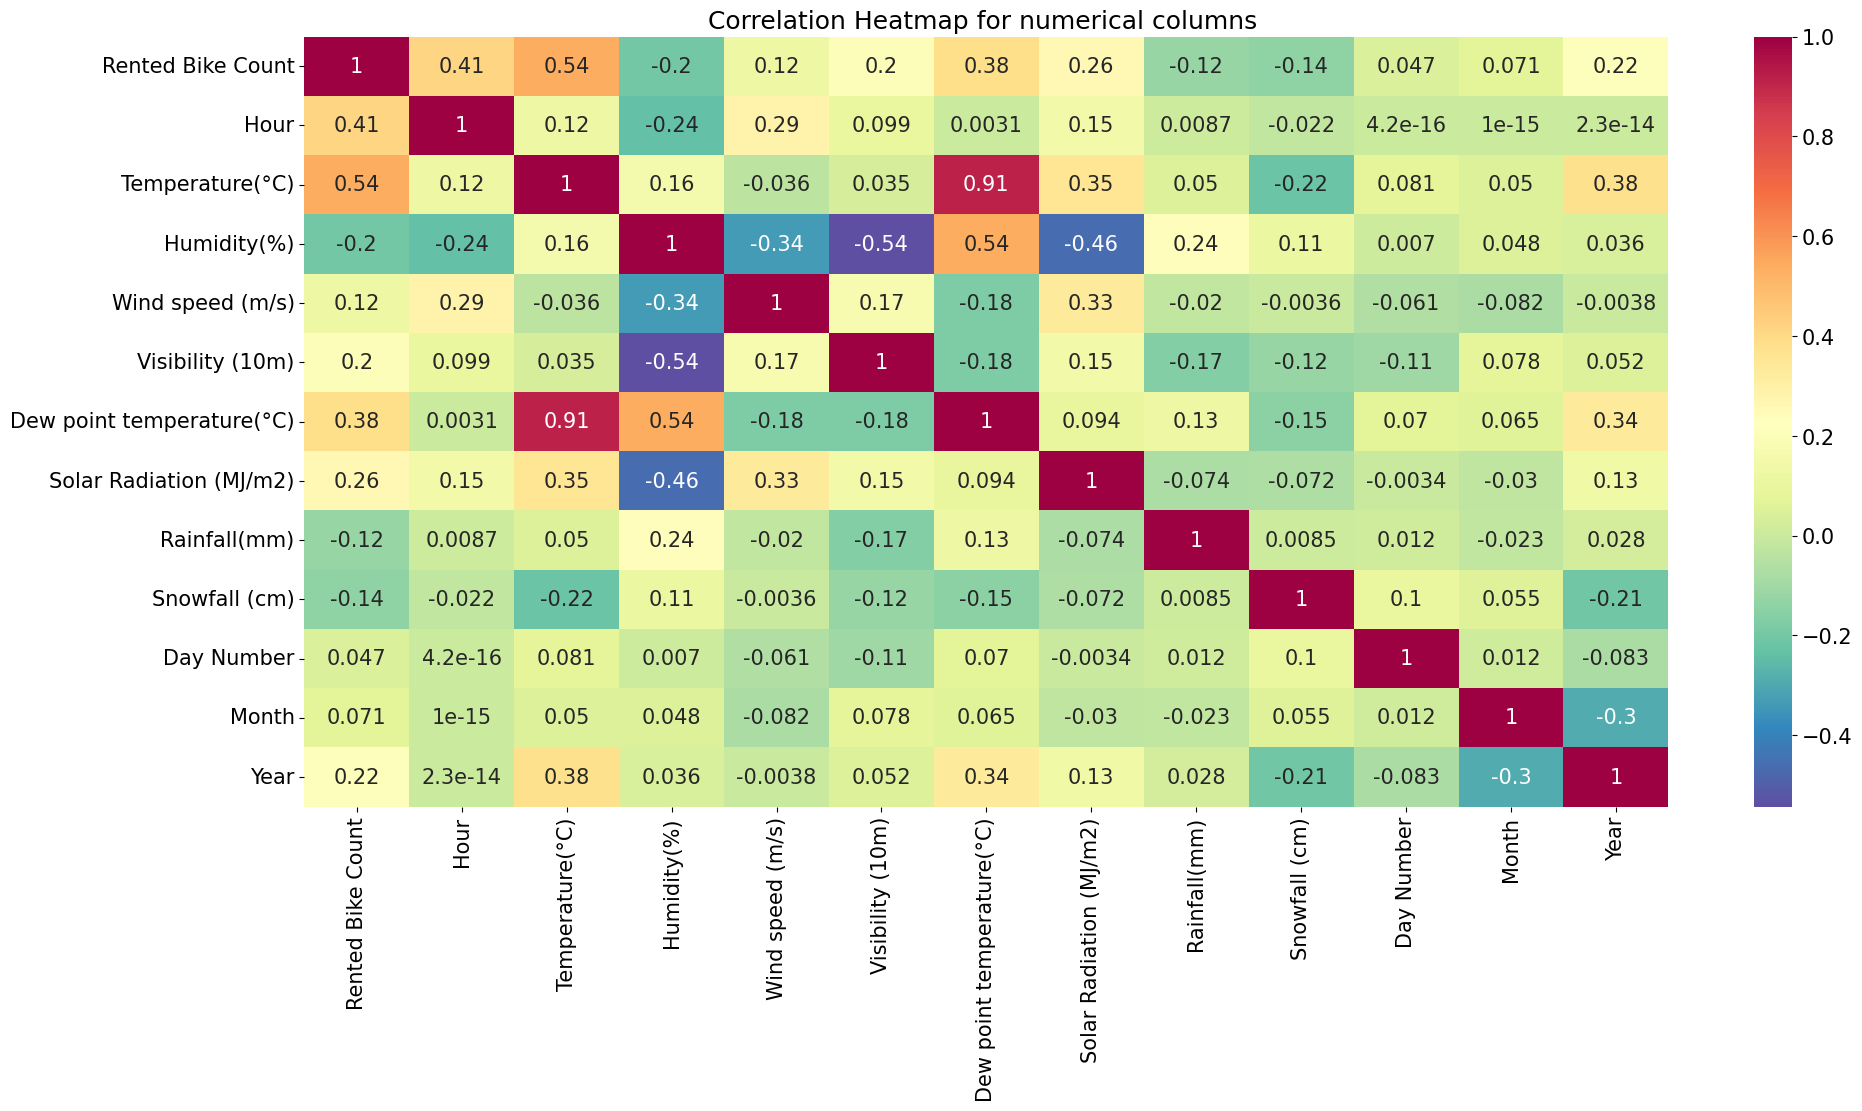

In [25]:
# Chart - 3 visualization code
plt.figure(figsize=(22,10))
# title
plt.title("Correlation Heatmap for numerical columns ")
# plotting heatmap using seaborn to establish relations between features
sns.heatmap(bike_df.corr(),annot=True,cmap='Spectral_r');

##### 1. Why did you pick the specific chart?

purpose of a heatmap is to visualize the distribution and intensity of data across a two-dimensional space


##### 2. What is/are the insight(s) found from the chart?



Heat map shows slightly postive relation of Rented bike count with Hour, Temperature,Dew point Temperature, Solar Radiaton

Bike sharing count is negatively co-related to Humidity, Snowfall, Rainfall

Temperature and Dew point temperature are positively co-related.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

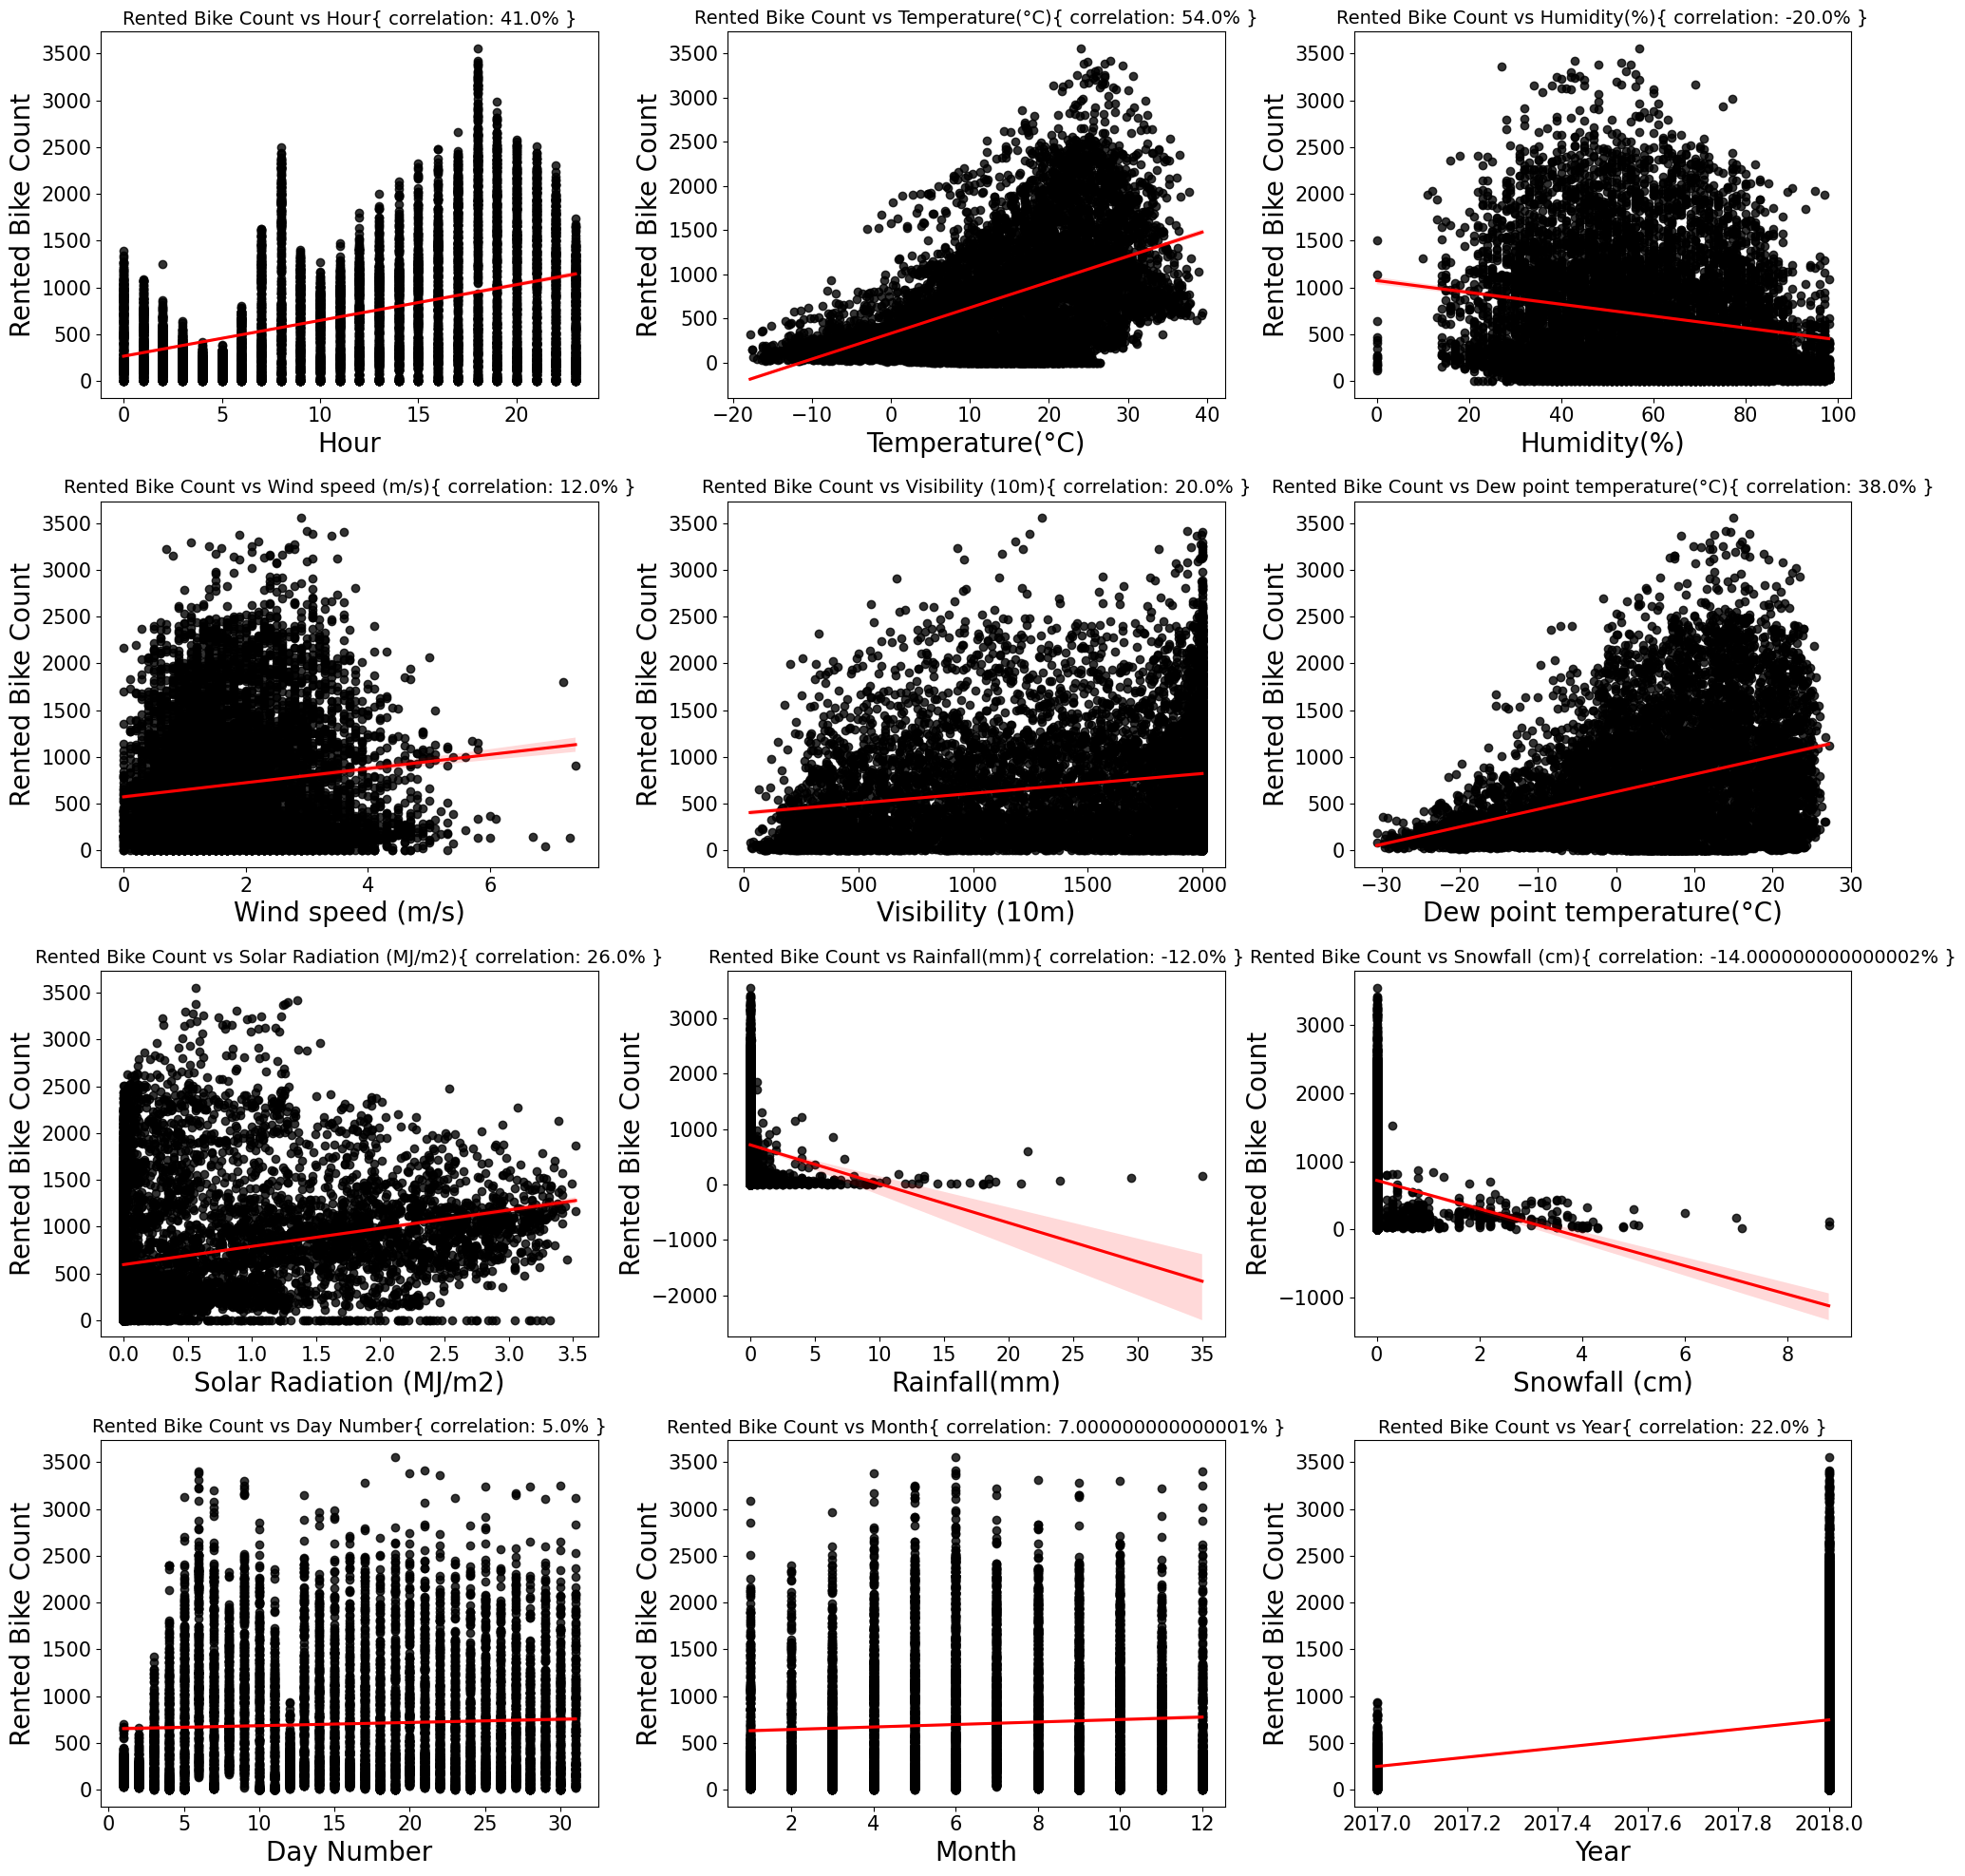

In [26]:
# plotting regression subplots for every numerical column with respect to our target variable "Rented Bike Count" just to check the relationship between them
numeric_cols = bike_df[bb]
fig, axs = plt.subplots(4, 3, figsize=(20,20), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(numeric_cols.columns[1:]):
    sns.regplot(x=col, y="Rented Bike Count", data=numeric_cols, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=15) 
    axs[i].tick_params(axis='y', colors='black', labelsize=15)
    axs[i].set_xlabel(col, color='black', fontsize=20)
    axs[i].set_ylabel("Rented Bike Count", color='black', fontsize=20)
    independant = numeric_cols[col]
    target = numeric_cols['Rented Bike Count']
    correlation = independant.corr(target)
    axs[i].set_title('Rented Bike Count vs ' + col + '{ correlation: ' + str((round(correlation,2))*100) + '% }', color='black',fontsize=14);
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?




This graph tells us about the relation between all the independant variable and our dependant variable 'Rented Bike Count'




##### 2. What is/are the insight(s) found from the chart?

Bike sharing count is positively co- related to Hour as the Hours Progress from 0 (12 am) to 20 (8pm) the bike sharing count increases.

Bike sharing is positively co-related to tempearature as the temperature approaches 30*C.

Though one thing to notice the positive co-relation is applicable only because temp is Seoul rarely crosses 40 Degress

Humidity, Snowfall, Rainfall, are negatively co-related to Bike rent count.

Solar radiation and Dew Point temperatuer are slightly positively realted to Bike sharing count.

#### Chart - 4

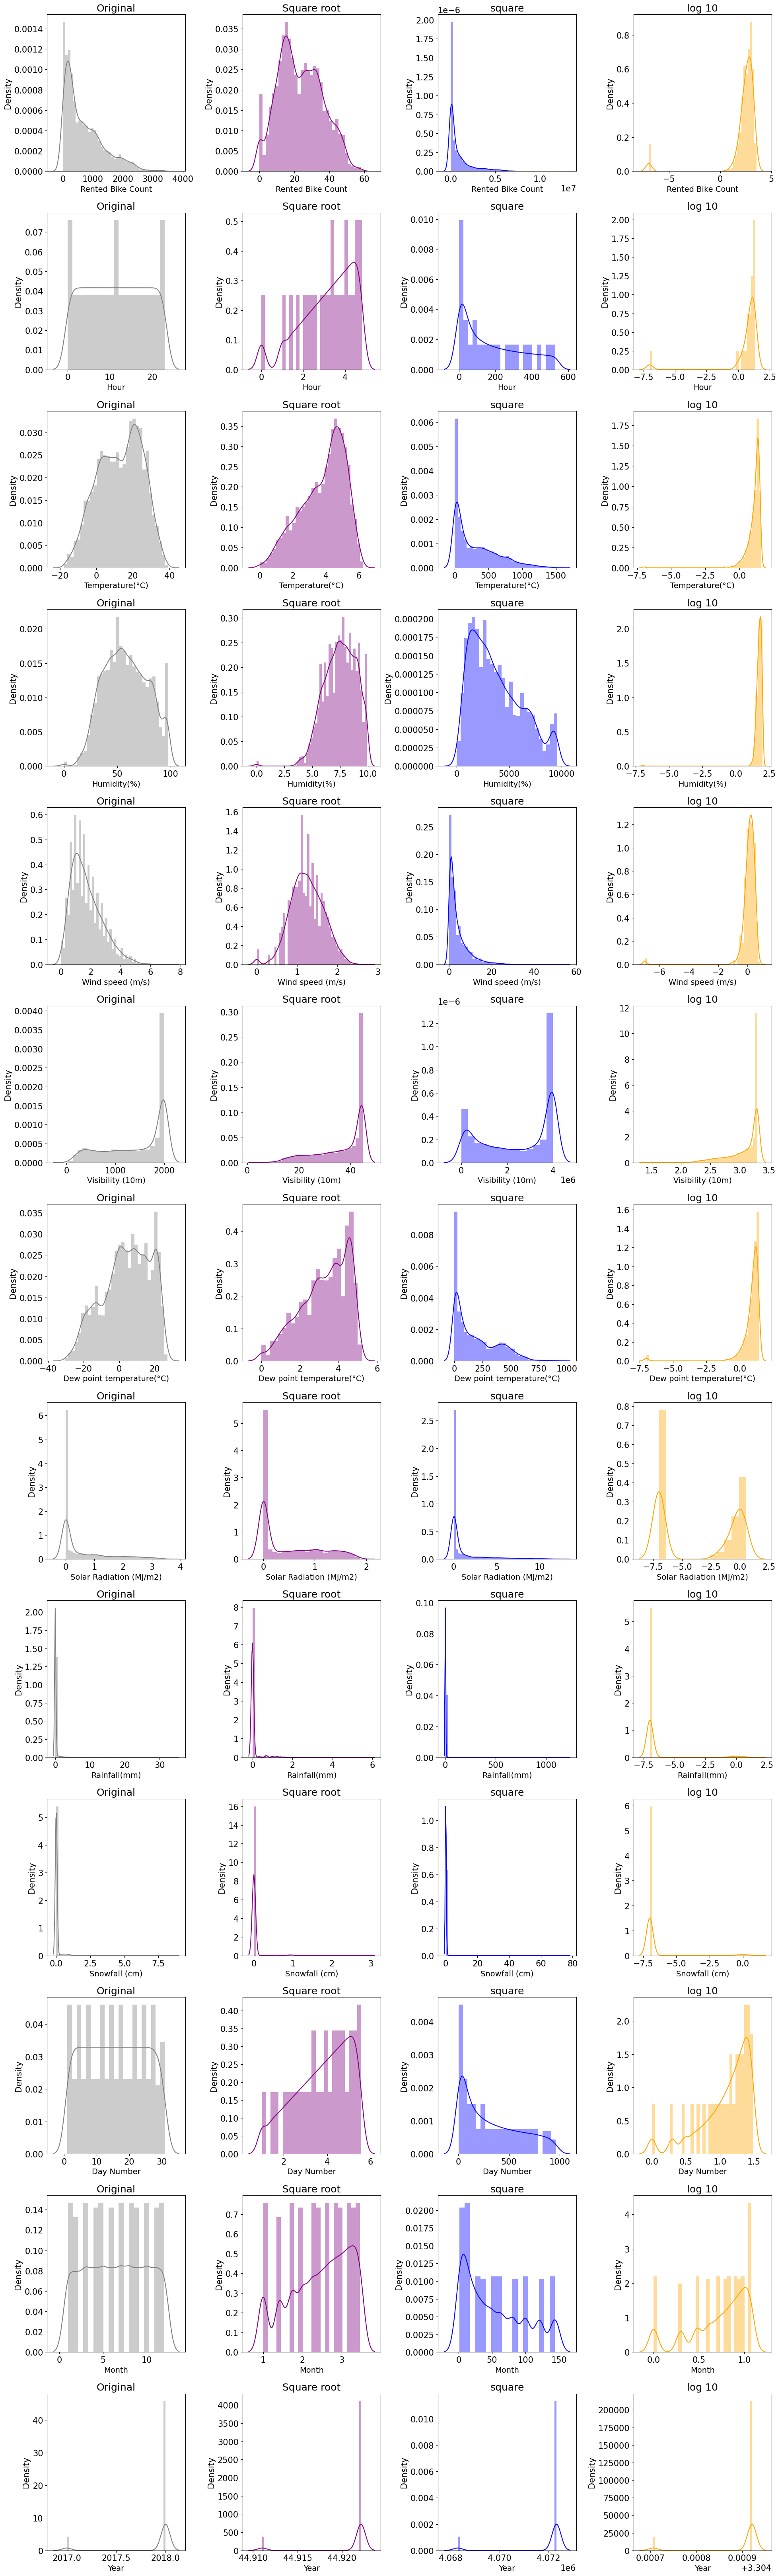

In [27]:
# Checking best transformation for every numerical column in our dataset
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), ncols=4, figsize=(20, 5*len(numeric_cols.columns)))
for i, col in enumerate(numeric_cols.columns):
    sns.distplot((numeric_cols[col]), ax=axes[i, 0], color='grey').set_title("Original") # Original column
    sns.distplot(np.sqrt(numeric_cols[col]), ax=axes[i, 1], color='purple').set_title("Square root")  # applying Square root transformation
    sns.distplot(np.log10(numeric_cols[col]+0.0000001), ax=axes[i, 3], color='orange').set_title("log 10")  # applying log transformation
    sns.distplot((numeric_cols[col]**2), ax=axes[i, 2], color='blue').set_title("square")  # applying Square transformation
    axes[i, 0].set_xlabel(col, fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=14)
    axes[i, 2].set_xlabel(col, fontsize=14)
    axes[i, 3].set_xlabel(col, fontsize=14)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

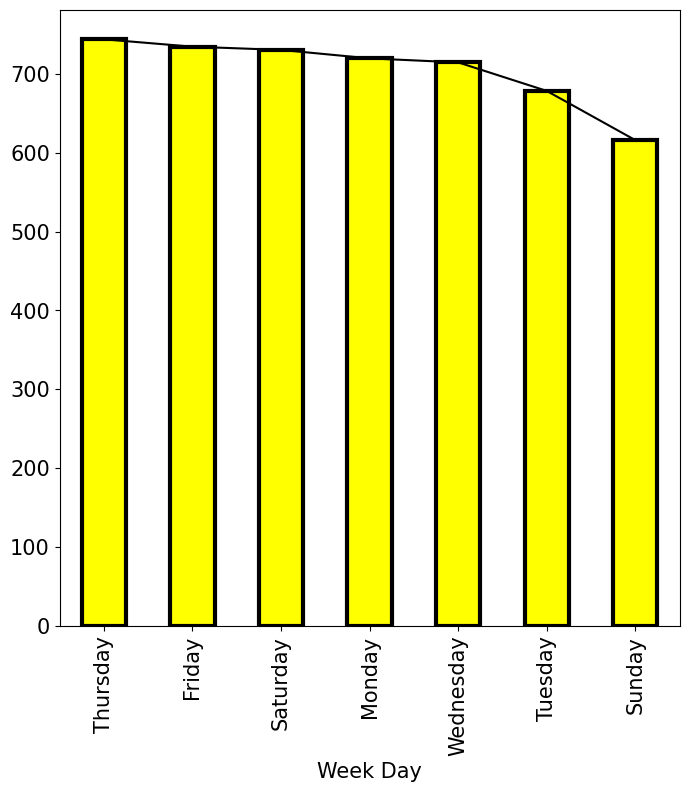

In [28]:
# Chart - 6 visualization code
pp=bike_df.groupby('Week Day')['Rented Bike Count'].mean().sort_values(ascending=False)
pp.plot(color='black')
pp.plot(kind='bar',color=['yellow'],linewidth=3,edgecolor='black');

In [29]:
pp

Week Day
Thursday     743.803686
Friday       734.449346
Saturday     730.348558
Monday       719.635833
Wednesday    714.521226
Tuesday      678.362421
Sunday       615.968364
Name: Rented Bike Count, dtype: float64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum() # there are no missing values

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Week Day                     0
Day Number                   0
Month                        0
Year                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There's no need to use any technique as the data has no missing value




### 2. Handling Outliers

In [34]:
# writing a function to detect outliers using boxplot
def outlier_detection(df):
      for column in df.columns:
        plt.figure(figsize=(10, 6))  # figure size
        plt.boxplot(df[column])  # Generate the box plot
        plt.title(f'Outliers for {column}')  # Set the title
        plt.xlabel(column)  # Set the x-axis label
        plt.ylabel('Value ----->')  # Set the y-axis label
        plt.show()

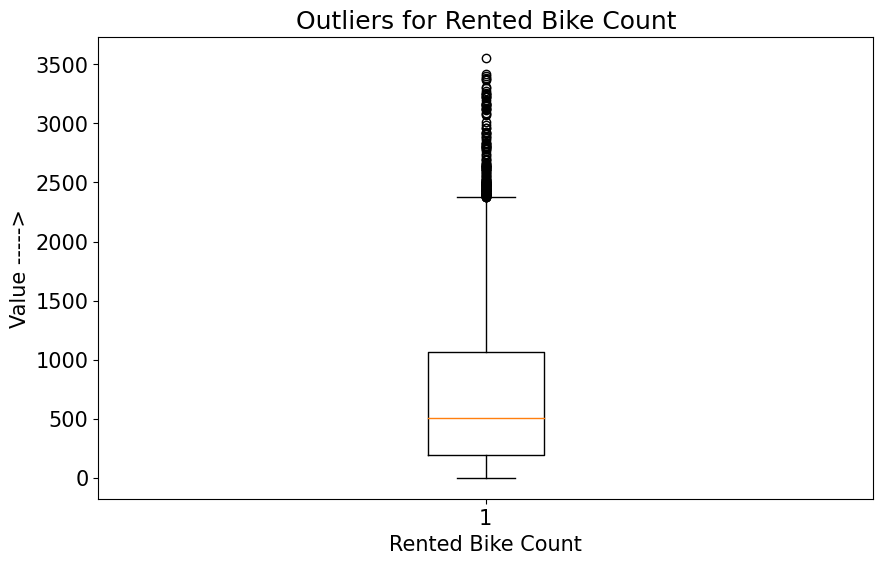

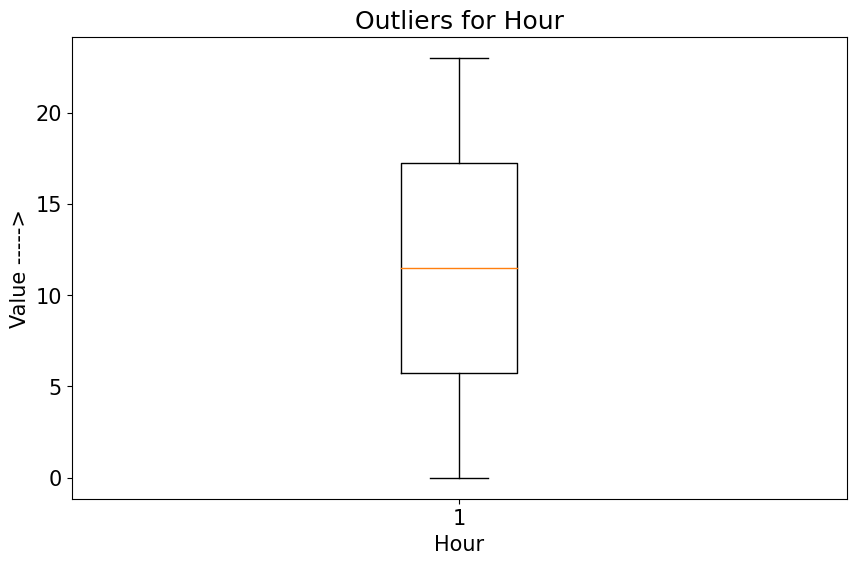

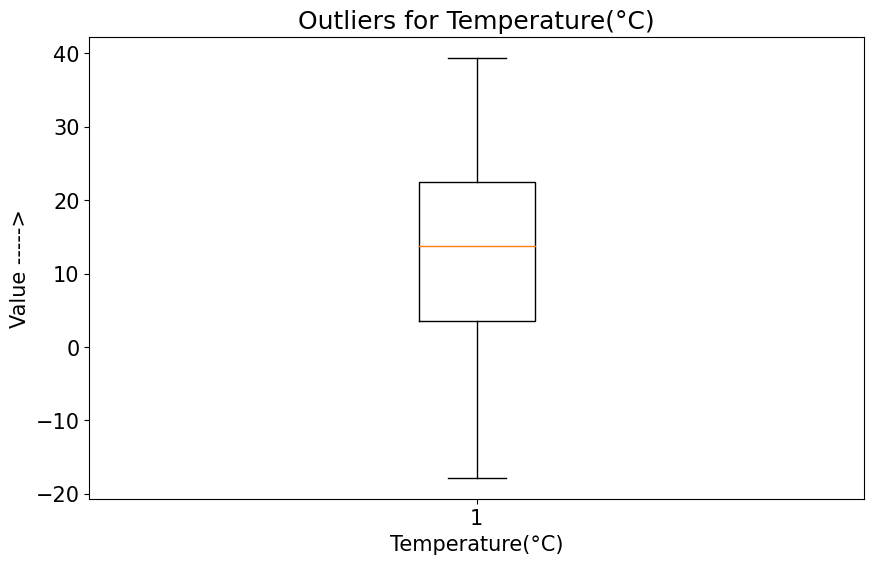

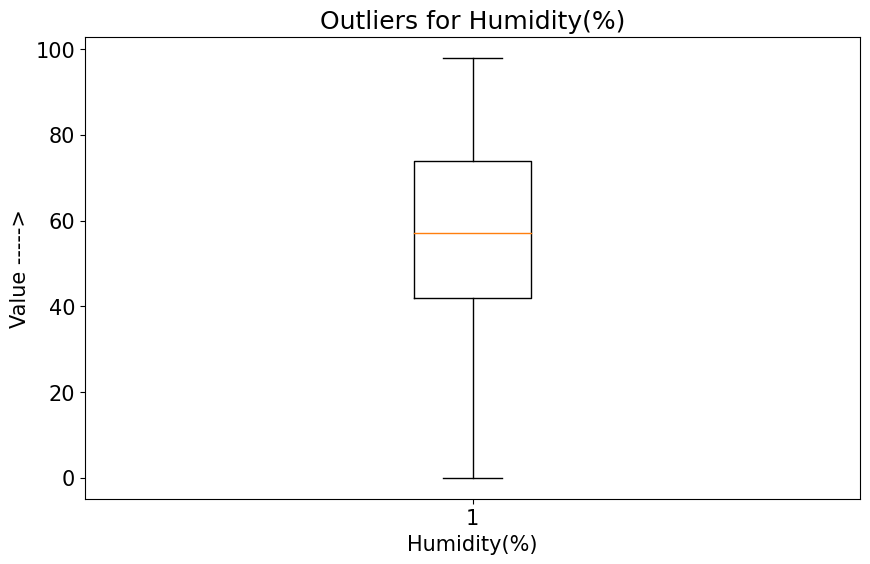

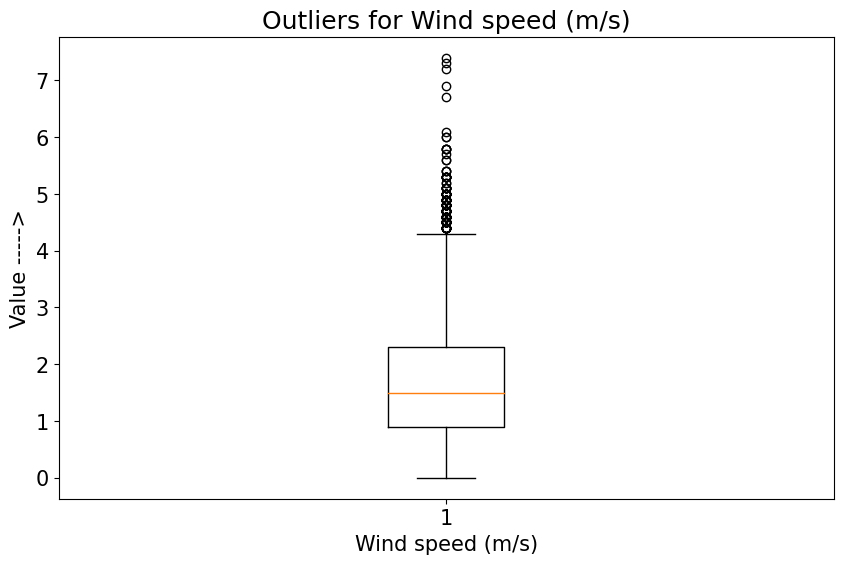

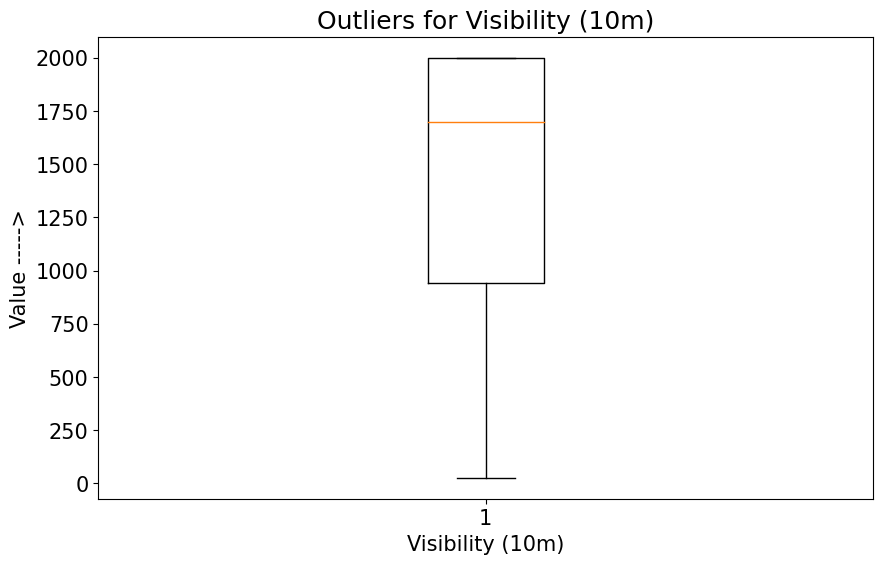

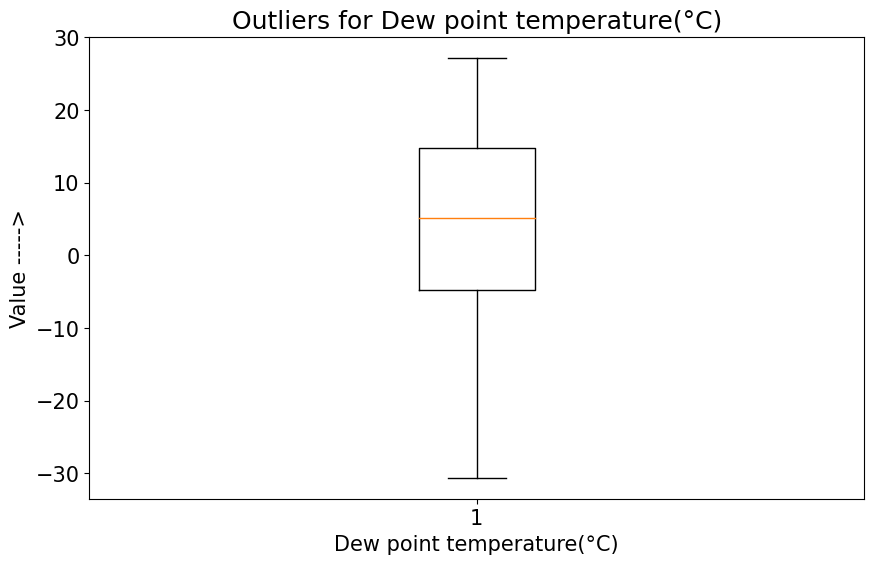

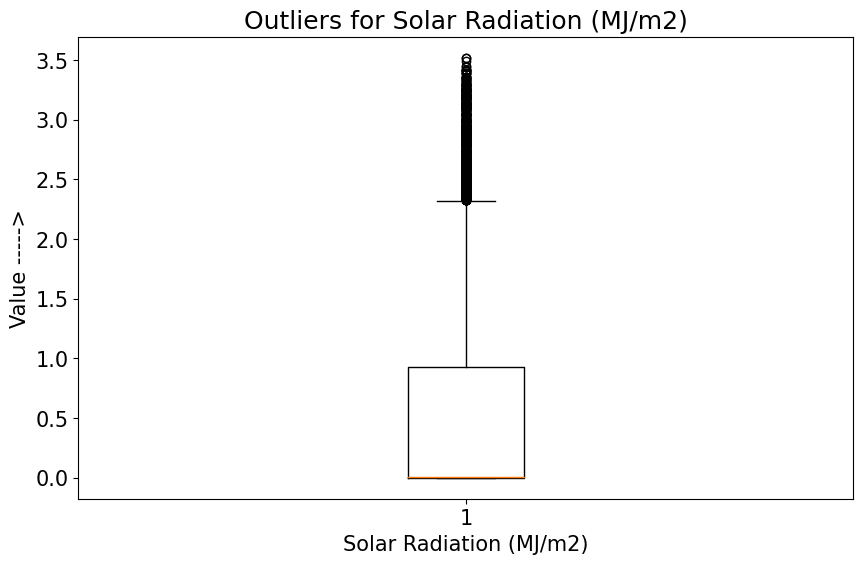

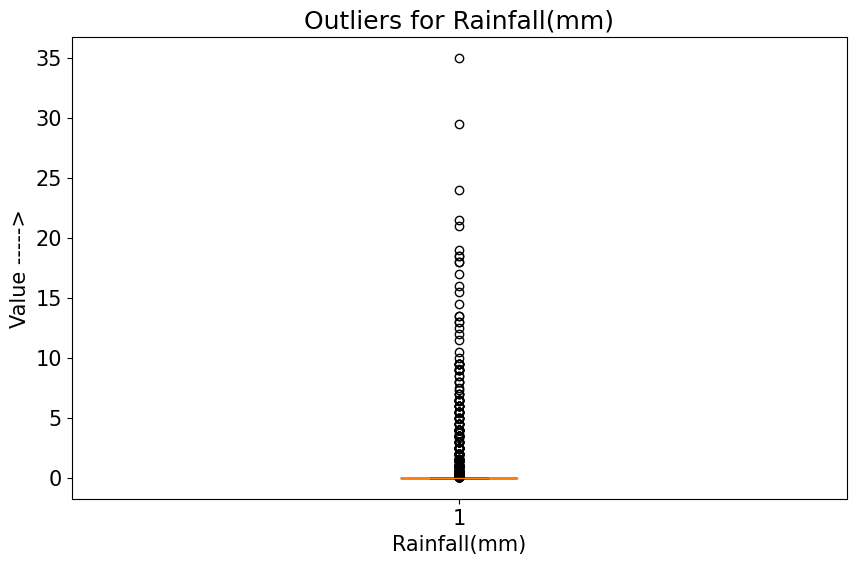

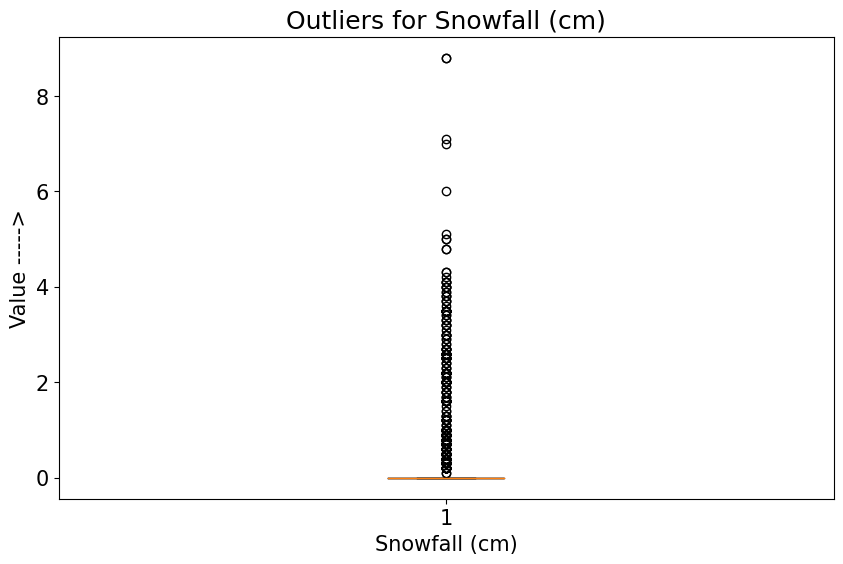

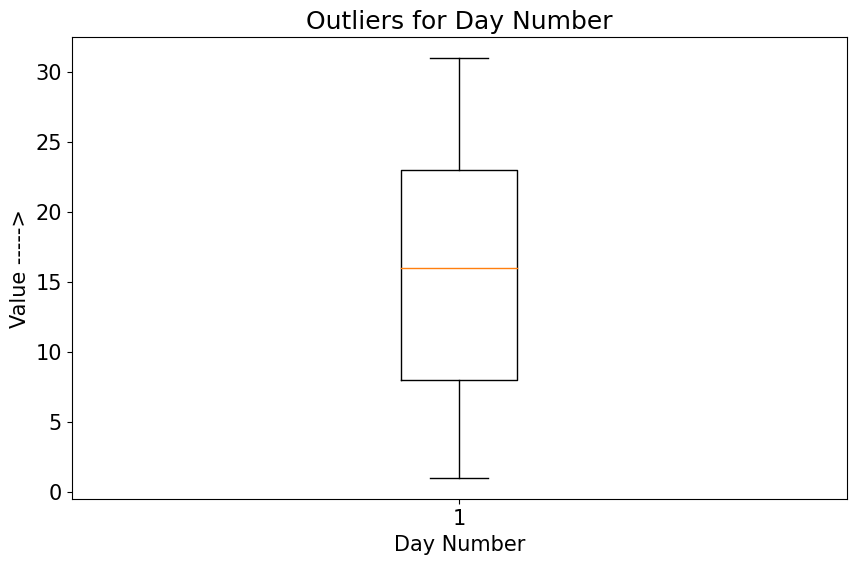

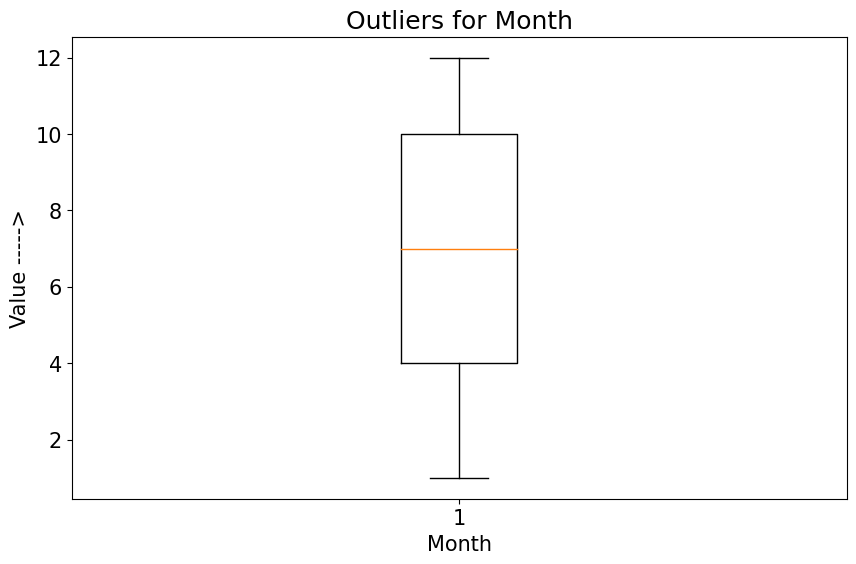

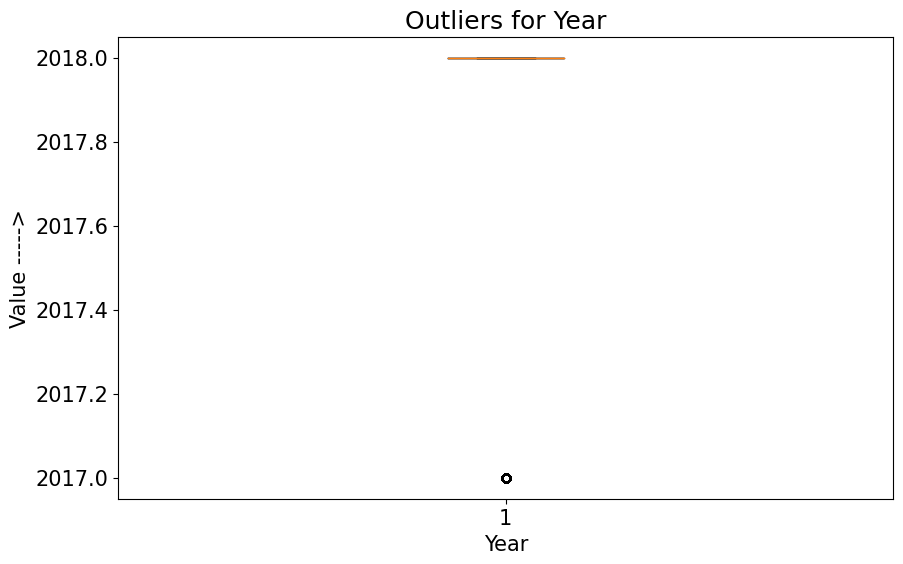

In [35]:
outlier_detection(bike_df[bb])

In [36]:
# Removing Outliers & Outlier treatments using IQR method on our target variable
percentile25 = numeric_cols['Rented Bike Count'].quantile(0.25)
percentile75 = numeric_cols['Rented Bike Count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
# using capping to substitute upper limit and lower limits values where we have outliers
new_df_cap = bike_df.copy()
new_df_cap['Rented Bike Count'] = np.where(new_df_cap['Rented Bike Count'] > upper_limit,upper_limit,
    np.where(
        new_df_cap['Rented Bike Count'] < lower_limit,
        lower_limit,
        new_df_cap['Rented Bike Count']
    )
)

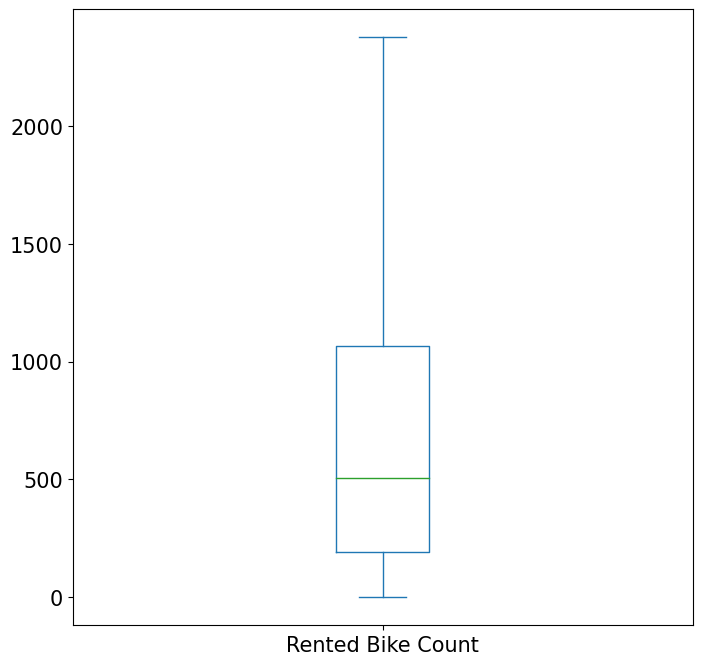

In [37]:
# checking again if outliers got removed or not from our target variable
new_df_cap['Rented Bike Count'].plot(kind='box');

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

## **VIF Calculation**
**Variance Inflation Factor, sometimes known as VIF, is a tool used in regression analysis to detect and quantify multicollinearity. When two or more independent variables in a regression model have a high degree of correlation with one another, this is referred to as multicollinearity. This can result in estimates of the coefficients of the variables that are unreliable and unstable.**

**VIF assesses how much the variance of an estimated regression coefficient is raised as a result of collinearity with other independent variables in the model. It is determined as the difference between the variance of the coefficient estimate in the entire model and the variance of the coefficient estimate in a model that only contains the relevant variable.**

In [38]:
# creating a function to calculate VIF to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_VIF(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif

In [39]:
cal_VIF(new_df_cap[[i for i in new_df_cap.describe().columns if i not in ['Rented Bike Count','Year','Dew point temperature(°C)']]])

Variable       VIF
0                     Hour  3.998419
1          Temperature(°C)  3.236167
2              Humidity(%)  6.757926
3         Wind speed (m/s)  4.621365
4         Visibility (10m)  5.455330
5  Solar Radiation (MJ/m2)  2.280208
6             Rainfall(mm)  1.081555
7            Snowfall (cm)  1.136671
8               Day Number  3.849545
9                    Month  4.603431

In [40]:
# Removing all the columns causing multicolinearity in our data set
new_df_cap=new_df_cap.drop(['Dew point temperature(°C)','Year'],axis=1)

### 3. Categorical Encoding

In [41]:
# Encoding categorical columns 
new_df_cap = pd.get_dummies(data=new_df_cap, drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# splitting data into train and test set and using square root transformation to remove skewness from our target variable
x = new_df_cap.drop('Rented Bike Count',axis=1)
y = (new_df_cap['Rented Bike Count'])**(1/2) # applying square root transformation on target variable to remove skewness

### 6. Data Splitting

In [55]:
# splitting data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state =42)

print(x_train.shape)

(7446, 21)


In [56]:
x_train.shape

(7446, 21)

In [57]:
x_test.shape

(1314, 21)

In [58]:
y_train.shape

(7446,)

In [59]:
y_test.shape

(1314,)

### 7. Data Scaling

In [60]:
# scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
# applying Yeo-Johnson transformation to train and test data for fixing skewness
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()

x_train = pt1.fit_transform(x_train)
x_test = pt1.transform(x_test)

# 7. **Model Building**

### **Model 1 - Linear Regression**

In [62]:
# Using linear regression
model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [63]:
# y-intercept (Bo)
model.intercept_

23.406887046082165

In [64]:
# model parameters
model.coef_

array([ 3.6201557 ,  4.88245778, -1.68220758,  0.04438414,  0.12382583,
        0.34742902, -3.11189807,  0.03131274, -0.02540785,  0.27124955,
       -1.10918054, -1.23722567, -3.6607018 ,  0.57301098,  5.11479012,
       -0.18153095, -0.36229796, -0.61797368, -0.26543491, -0.33140241,
       -0.16208549])

In [65]:
# train set prediction
y_train_pred = model.predict(x_train)
y_train_pred

array([39.1426726 , 24.29048265, 38.40117096, ..., 35.45472626,
       18.13590375, 36.58372094])

In [66]:
# test set prediction
y_test_pred = model.predict(x_test)
y_test_pred

array([30.15046929, 36.59659925, 36.73602873, ..., 23.15661572,
       20.48970769, 35.09156922])

In [67]:
y_test_pred

array([30.15046929, 36.59659925, 36.73602873, ..., 23.15661572,
       20.48970769, 35.09156922])

In [68]:
y_test

6056    41.569219
5556    28.670542
5990    25.651511
7674    48.750641
3319    32.908965
          ...    
6224    43.794977
4295    35.312887
2770    20.371549
1244    16.062378
4607    34.510868
Name: Rented Bike Count, Length: 1314, dtype: float64

In [69]:
y_train

5852    37.960506
7568    44.676616
5970    44.226689
6791    30.675723
576     12.649111
          ...    
5734    38.820098
5191    28.774989
5390    31.606961
860     17.944358
7270    38.742741
Name: Rented Bike Count, Length: 7446, dtype: float64

In [70]:
# test r2 score
r2=r2_score(y_test, y_test_pred)
r2

0.6881788592309074

In [71]:
# adjusted r_2
adj_r2 = 1-(1-r2_score((y_test),(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
adj_r2

0.6831105589552487

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# creating a function for finding out training set performance metrics
def train_data_metrics(y_train_values,y_train_predictions):
    r2 = r2_score(y_train_values,y_train_predictions)
    adj_r2 = 1-(1-r2_score((y_train_values),(y_train_predictions)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
    print(f'Mean Absolute Error for train data : {mean_absolute_error(y_train_values,y_train_predictions)}')
    print(f'Mean Squared Error for train data : {mean_squared_error(y_train_values,y_train_predictions)}')
    print(f'Root Mean Squared Error for train data : {np.sqrt(mean_squared_error(y_train_values,y_train_predictions))}')
    print(f'R_square for train data : {r2}')
    print(f'Adjusted R_square for train data : {adj_r2}')
train_data_metrics(y_train,y_train_pred)    

Mean Absolute Error for train data : 5.376810894699641
Mean Squared Error for train data : 47.816627564313194
Root Mean Squared Error for train data : 6.914956801333845
R_square for train data : 0.6862178292094221
Adjusted R_square for train data : 0.6853302449439853


In [73]:
# creating a function for finding out testing set performance metrics
def test_data_metrics(y_test_values,y_test_predictions):
    r2 = r2_score(y_test_values,y_test_predictions)
    adj_r2 =1-(1-r2_score((y_test_values),(y_test_predictions)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
    print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test_values,y_test_predictions)}')
    print(f'Mean Squared Error for test data : {mean_squared_error(y_test_values,y_test_predictions)}')
    print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test_values,y_test_predictions))}')
    print(f'R_square for test data : {r2}')
    print(f'Adjusted R_square for test data : {adj_r2}')
test_data_metrics(y_test, y_test_pred)    

Mean Absolute Error for test data : 5.328604715566867
Mean Squared Error for test data : 46.360955618355
Root Mean Squared Error for test data : 6.8088879869149705
R_square for test data : 0.6881788592309074
Adjusted R_square for test data : 0.6831105589552487


In [74]:
# using gridsearchCV for finding out the best parameters 
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, 1], 'positive': [True, False]}
# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best cross-validation score:  0.6838532309423713


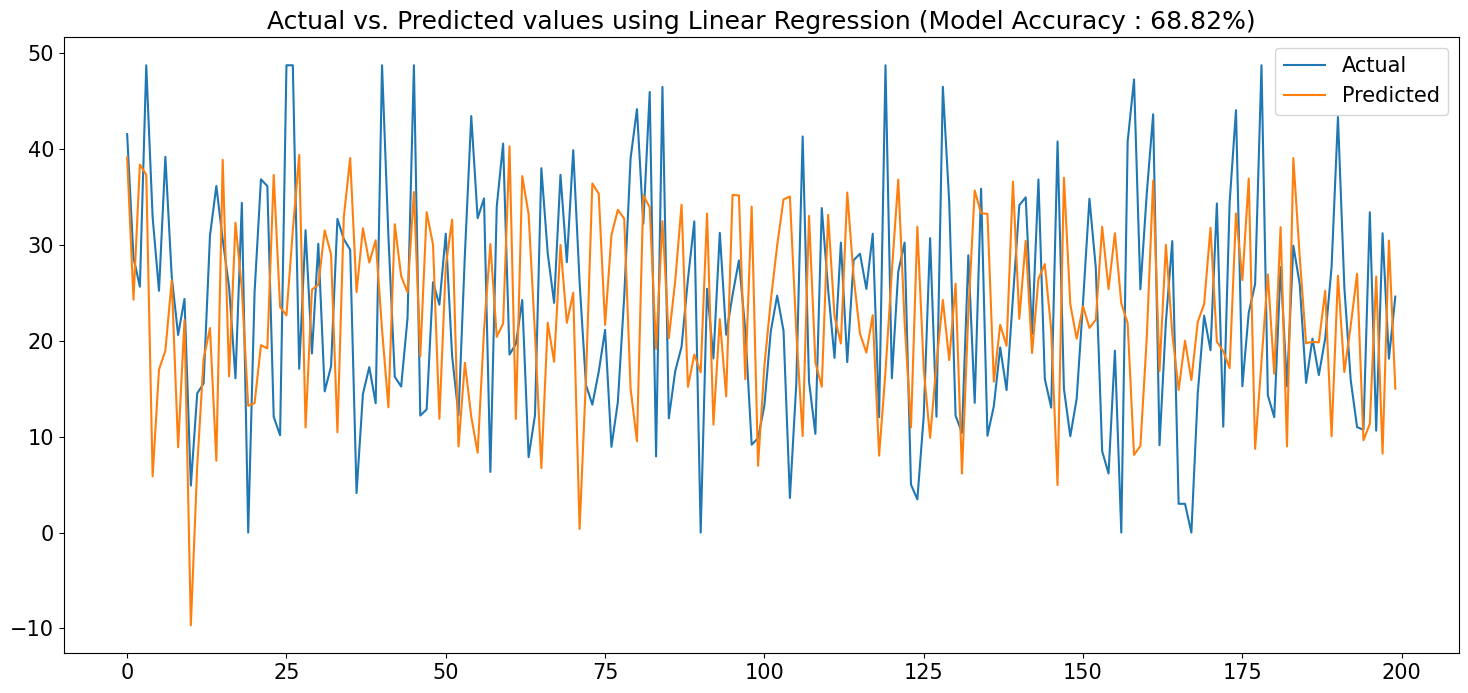

In [75]:
# Graph for linear regression actual vs predicted values
plt.figure(figsize = (18,8))
plt.plot(np.array(y_test[:200]), label='Actual')
plt.plot(np.array(y_train_pred[:200]), label='Predicted')
plt.title(f'Actual vs. Predicted values using Linear Regression (Model Accuracy : {round(r2*100,2)}%)')
plt.legend()
plt.show()

### **Model 2 - Polynomial Regression**

In [76]:
# implementing polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [77]:
# using polynomial regression with the help of linear regression
model.fit(x_train_poly,y_train)

LinearRegression()

In [78]:
# training set prediction
y_train_pred_poly = model.predict(x_train_poly)
y_train_pred_poly

array([39.93652344, 29.56420898, 40.33764648, ..., 31.71972656,
       15.71655273, 41.01660156])

In [79]:
# testing set prediction
y_test_pred_poly = model.predict(x_test_poly)
y_test_pred_poly

array([30.05810547, 28.70239258, 31.60571289, ..., 25.03466797,
       13.20068359, 42.27783203])

In [80]:
# training set r2 score 
r2_score(y_train,y_train_pred_poly)

0.8088569679265929

In [81]:
# testing set r2 score
r2_poly = r2_score(y_test,y_test_pred_poly)
r2_poly

0.7997118845587308

In [82]:
# metrics for train data
train_data_metrics(y_train,y_train_pred_poly)

Mean Absolute Error for train data : 4.051666125141648
Mean Squared Error for train data : 29.127898354262143
Root Mean Squared Error for train data : 5.397026806887487
R_square for train data : 0.8088569679265929
Adjusted R_square for train data : 0.8083162885524628


In [83]:
# metrics for test data
test_data_metrics(y_test,y_test_pred_poly)    

Mean Absolute Error for test data : 4.063494213964563
Mean Squared Error for test data : 29.77844416819933
Root Mean Squared Error for test data : 5.456962906984006
R_square for test data : 0.7997118845587308
Adjusted R_square for test data : 0.7964564275740043


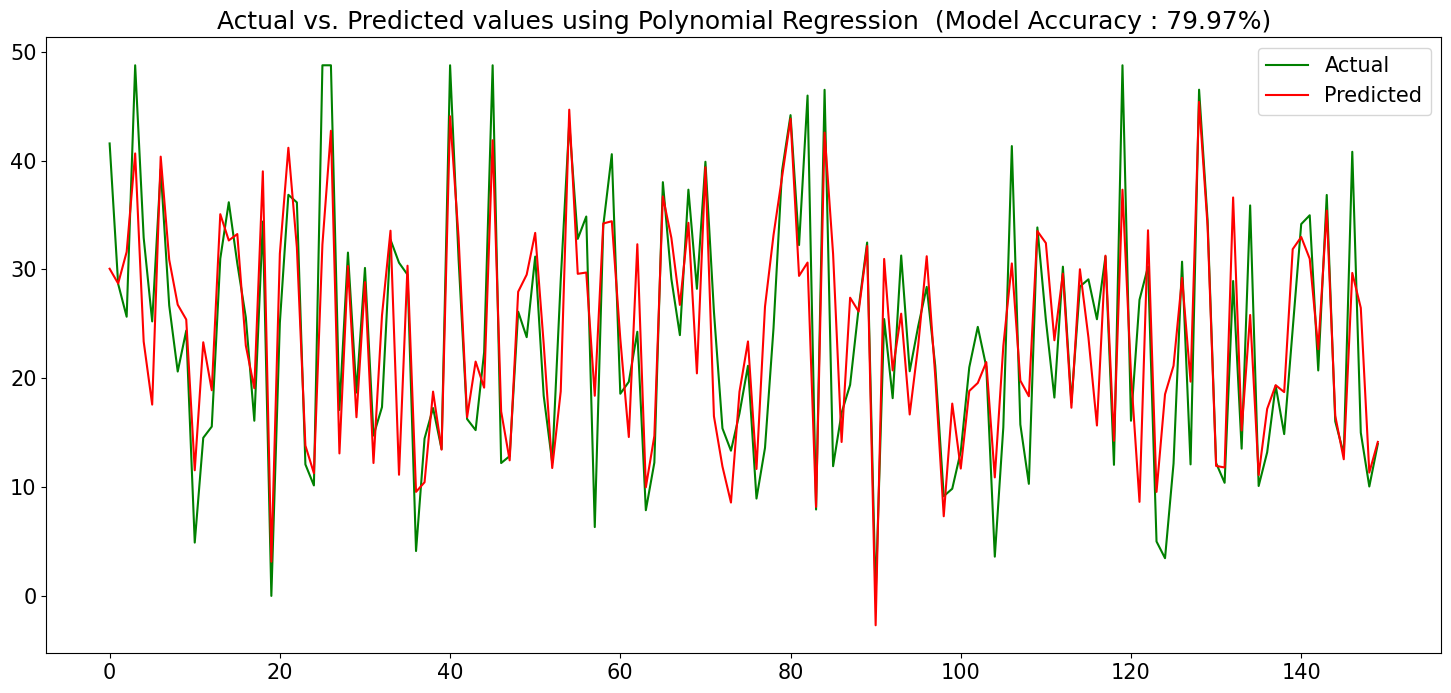

In [84]:
# checking train and test accuracy through graph
plt.figure(figsize = (18,8))
plt.plot(np.array(y_test[:150]),color='green', label='Actual')
plt.plot(np.array(y_test_pred_poly[:150]),color='red', label='Predicted')
plt.title(f'Actual vs. Predicted values using Polynomial Regression  (Model Accuracy : {round(r2_poly*100,2)}%)')
plt.legend()
plt.show()

# **Ridge**

In [85]:
# using ridge with cross validation
from sklearn.linear_model import RidgeCV
rd = RidgeCV(cv=5)
rd.fit(x_train_poly,y_train)

RidgeCV(cv=5)

In [86]:
# predicting train and test sets
y_train_pred_rd = rd.predict(x_train_poly)
y_test_pred_rd = rd.predict(x_test_poly)

In [87]:
# best value of alpha selected through cross validation
rd.alpha_

10.0

In [88]:
# performance metrics for train set 
train_data_metrics(y_train_pred_rd,y_train)

Mean Absolute Error for train data : 4.052242293145032
Mean Squared Error for train data : 29.132631942850743
Root Mean Squared Error for train data : 5.397465325766414
R_square for train data : 0.7630728388330106
Adjusted R_square for train data : 0.7624026515506147


In [89]:
# performance metrics for test set 
test_data_metrics(y_test_pred_rd,y_test)

Mean Absolute Error for test data : 4.06372438414198
Mean Squared Error for test data : 29.77501946758418
Root Mean Squared Error for test data : 5.456649106144189
R_square for test data : 0.747199054006853
Adjusted R_square for test data : 0.74309006030263


# **Lasso**

In [90]:
# Using Lasso regression with cross validation 
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=5)
lasso_cv_model.fit(x_train_poly,y_train)

LassoCV(cv=5)

In [91]:
# best value of alpha using cross validation 
lasso_cv_model.alpha_

0.022593696139811936

In [92]:
# predicting values for our test set
y_test_predictions_ls = lasso_cv_model.predict(x_test_poly)

In [93]:
# predicting values for our train set
y_train_predictions_ls = lasso_cv_model.predict(x_train_poly)

In [94]:
# performance metrics values for our train set
train_data_metrics(y_train_predictions_ls,y_train)

Mean Absolute Error for train data : 4.093206460511787
Mean Squared Error for train data : 29.62649383074724
Root Mean Squared Error for train data : 5.4430224903767614
R_square for train data : 0.7532503547199472
Adjusted R_square for train data : 0.7525523829323824


In [95]:
# performance metrics for test set 
test_data_metrics(y_test_predictions_ls,y_test)  

Mean Absolute Error for test data : 4.0861376690941205
Mean Squared Error for test data : 29.844610232039305
Root Mean Squared Error for test data : 5.4630220786703125
R_square for test data : 0.740723289425401
Adjusted R_square for test data : 0.736509039485721


# **Elastic Net**

In [96]:
# initializing elastic net 
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.1, 1.0, 10.0], cv=5,max_iter = 10000,n_alphas=100)
elastic_model.fit(x_train_poly,y_train)

ElasticNetCV(alphas=[0.1, 1.0, 10.0], cv=5,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)

In [97]:
# best l1_ratio value selected
elastic_model.l1_ratio_

0.5

In [98]:
# best alpha value selected
elastic_model.alpha_

0.1

In [99]:
# train and test set predictions after fitting values on model 
y_test_pred_en = elastic_model.predict(x_test_poly)
y_train_pred_en = elastic_model.predict(x_train_poly)

In [100]:
# performance metrics for train set
train_data_metrics(y_train_pred_en,y_train)

Mean Absolute Error for train data : 4.230174034171245
Mean Squared Error for train data : 31.249031455737107
Root Mean Squared Error for train data : 5.590083313845788
R_square for train data : 0.7187186492157838
Adjusted R_square for train data : 0.7179229988431453


In [101]:
# performance metrics for test set 
test_data_metrics(y_test_pred_en,y_test)

Mean Absolute Error for test data : 4.1813974607121525
Mean Squared Error for test data : 31.15376763671054
Root Mean Squared Error for test data : 5.58155602289456
R_square for test data : 0.7085023764553134
Adjusted R_square for test data : 0.7037644119859339


In [108]:
models = {'Models': ['Linear Regression','Polynomial Regression','RidgeCV','LassoCV','ElasticNetCV'],
        'Train Accuracy':['68.62%','80.88%','76.30%','75.32%','71.87%'],
        'Test Accuracy': ['68.87%','79.97%','74.71%','74.07%','70.85%']
          }

In [110]:
pd.DataFrame(models)

Models Train Accuracy Test Accuracy
0      Linear Regression         68.62%        68.87%
1  Polynomial Regression         80.88%        79.97%
2                RidgeCV         76.30%        74.71%
3                LassoCV         75.32%        74.07%
4           ElasticNetCV         71.87%        70.85%

# **Conclusion**

Summer was the season with the highest number of bike rentals, followed by Autumn, Spring, and Winter. The busiest months for renting bikes are May through July, while December through February are the least popular months.

The working class makes up the vast majority of customers in the bike rental industry. The EDA study shows that in Seoul, the demand for bikes is higher during the weekdays while people are at work.

The best conditions are found in the afternoon from 4 to 8 pm, when the humidity is between 40% and 60%, and the temperature is between 20 and 30 degrees.

Major elements influencing the demand for rental bikes include temperature, daytime, solar radiation, humidity, and hour of the day.

The linear model's prediction was very low since there was a very weak linear relationship between the feature and the labels.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***